# Working with Tweets

In this notebook, we will delve into the analysis of tweet contents.

We consider the dataset of historical tweets from Elon Musk, the current owner of Twitter, and ask the following questions:
* What was Elon most actively tweeting about during the earlier years of this dataset?
* Who was Elon most frequently referring to?

We will explore how to work with the contents of tweets.

In [1]:
# imports

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Let's get some basics (or a refresher) of working with texts in Python. Texts are sequences of discrete symbols (words or, more generically, tokens).

## Import the dataset

> More info on how to harvest tweets automatically, see Notebook 7. 

Let us import the Elon Musk's tweets dataset in memory.

In [3]:
# Import the dataset using Pandas, and create a data frame

file_path = 'data/elonmusk_tweets.csv'

df_elon = pd.read_csv(file_path, encoding="utf-8")

In [4]:
df_elon.head(10)

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...
1,848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...
2,848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?"
3,848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...
4,848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...
5,848415731502923777,2017-04-02 06:04:07,@Lexxxzis It's just a helicopter in helicopter...
6,848415356263702528,2017-04-02 06:02:38,@verge It won't matter
7,848398971139629057,2017-04-02 04:57:31,@SuperCoolCube Pretty good
8,848244577521647616,2017-04-01 18:44:01,Why did we waste so much time developing silly...
9,848243350993895424,2017-04-01 18:39:09,Technology breakthrough: turns out chemtrails ...


In [5]:
df_elon.tail(5)

,id,created_at,text
2814,142881284019060736,2011-12-03 08:22:07,That was a total non sequitur btw
2815,142880871391838208,2011-12-03 08:20:28,"Great Voltaire quote, arguably better than Twa..."
2816,142188458125963264,2011-12-01 10:29:04,I made the volume on the Model S http://t.co/w...
2817,142179928203460608,2011-12-01 09:55:11,Went to Iceland on Sat to ride bumper cars on ...
2818,15434727182,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someon..."


In [6]:
df_elon.shape  # (number of rows, number of columns)

(2819, 3)

In [7]:
tweets = df_elon["text"]
tweets_list = list(tweets)  # convert to Python list

for tweet in tweets_list[:10]:
    print(tweet)

And so the robots spared humanity ... https://t.co/v7JUJQWfCv
@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr… https://t.co/qQcTqkzgMl
@waltmossberg @mims @defcon_5 Et tu, Walt?
Stormy weather in Shortville ...
@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead.
@Lexxxzis It's just a helicopter in helicopter's clothing
@verge It won't matter
@SuperCoolCube Pretty good
Why did we waste so much time developing silly rockets? Damn you, aliens! So obtuse! You have all this crazy tech, but can't speak English!?
Technology breakthrough: turns out chemtrails are actually a message from time-traveling aliens describing the secret of teleportation


## Working with tweet contents

In [8]:
# import some of the most popular libraries for NLP in Python
import nltk
import string
# import sklearn # for machine learning

> If it is the first time you run nltk, it could be that you have to download its materials first. You only have to do this once. The error tells you which package needs to be downloaded. 

In [11]:
# For instance, run this once:
#nltk.download('punkt')

A typical NLP pipeline might look like the following:
    
<img src="images/spacy_pipeline.png" width="600px" heigth="600px">

* Tokenization: split a text into tokens.
* Filtering: remove some of the tokens if not needed (e.g., punctuation). If and how to remove is task dependent.
* Tagger, parser: syntactic structure.
* NER (Named Entity Recognition): find named entities.
* ...

More on this can be found in the optional Notebook 8.


### Tokenization revisited: splitting a text into constituent tokens.
A tokenizer takes a string and outputs a list of tokens.

NLTK provides us with a special tokenizer for Tweets:

In [12]:
from nltk.tokenize import TweetTokenizer, word_tokenize

tokenizer = TweetTokenizer(preserve_case=True, reduce_len=False, strip_handles=False)

In [13]:
example_tweet = df_elon.text[1]
print(example_tweet)

@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr… https://t.co/qQcTqkzgMl


We compare here two tokenizers: one for general English texts, and one specialized for tweets.

In [14]:
# This one was defined above and is the 'TweetTokenizer'
result1 = tokenizer.tokenize(example_tweet)
print(result1)

print("\n======\n")

# This is a 'normal' tokenizer
result2 = word_tokenize(example_tweet)
print(result2)

['@ForIn2020', '@waltmossberg', '@mims', '@defcon_5', 'Exactly', '.', 'Tesla', 'is', 'absurdly', 'overvalued', 'if', 'based', 'on', 'the', 'past', ',', 'but', "that's", 'irr', '…', 'https://t.co/qQcTqkzgMl']


['@', 'ForIn2020', '@', 'waltmossberg', '@', 'mims', '@', 'defcon_5', 'Exactly', '.', 'Tesla', 'is', 'absurdly', 'overvalued', 'if', 'based', 'on', 'the', 'past', ',', 'but', 'that', "'s", 'irr…', 'https', ':', '//t.co/qQcTqkzgMl']


**Question**: can you spot what the Twitter tokenizer is doing instead of a standard one?

### Filtering unnecessary tokens

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
# Some more pre-processing

tokenizer = TweetTokenizer(preserve_case=True, reduce_len=False, strip_handles=False)

def filter_tweet(tokens):
    """
    Normalize a tweet's text by removing punctuation tokens and URls.
    
    Args:
        tokens (list): List of tokens from a tokenizer
        
    Returns:
        list: List of non-punctuation and URL tokens
    """
    normalized = []
    
    for token in tokens:
        if token in string.punctuation:
            continue
        elif len(token) <= 3:
            continue
        elif token.startswith(('http', 'www')):
            continue
        else:
            normalized.append(token)
  
    return normalized

def tokenize_tweet(tweet, tokenizer=tokenizer):
    
    # This gives a list of tokens
    tokens = tokenizer.tokenize(tweet)
    filtered_tokens = filter_tweet(tokens)
    
    # This returns it back to a string
    normalized_tweet = " ".join(filtered_tokens)
    
    return normalized_tweet

In [17]:
print(result1)  # recall from some cells above
print("======")
print(filter_tweet(result1))  # the result of our normalization function

['@ForIn2020', '@waltmossberg', '@mims', '@defcon_5', 'Exactly', '.', 'Tesla', 'is', 'absurdly', 'overvalued', 'if', 'based', 'on', 'the', 'past', ',', 'but', "that's", 'irr', '…', 'https://t.co/qQcTqkzgMl']
['@ForIn2020', '@waltmossberg', '@mims', '@defcon_5', 'Exactly', 'Tesla', 'absurdly', 'overvalued', 'based', 'past', "that's"]


Now, add a column with a normalized version of the `text` column. 

Let's call it `clean_text`. We get this by applying (using Pandas' `.apply()` method) our just written function on every value of the column. 

In [18]:
df_elon["clean_text"] = df_elon["text"].apply(tokenize_tweet)

In [19]:
df_elon.head(5)

,id,created_at,text,clean_text
0,849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...,robots spared humanity
1,848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...
2,848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?",@waltmossberg @mims @defcon_5 Walt
3,848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...,Stormy weather Shortville
4,848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...,@DaveLeeBBC @verge Coal dying fracking It's ba...


In [ ]:
# Save cleaned up version to a file

df_elon.to_csv("stuff/df_elon.csv", index=False)

### Counter revisited: Building a dictionary with token occurrences

We want to build a dictionary of unique tokens, containing the number of times they appear in the corpus.

In [20]:
from collections import Counter

all_tokens = []  # empty list

for tweet in df_elon["clean_text"]:
    all_tokens += tweet.split()

In [21]:
all_tokens[:10]

['robots',
 'spared',
 'humanity',
 '@ForIn2020',
 '@waltmossberg',
 '@mims',
 '@defcon_5',
 'Exactly',
 'Tesla',
 'absurdly']

In [22]:
counter = Counter(all_tokens)

In [23]:
counter["robots"]

3

#### Quiz

* Find the tokens most used by Elon.
* Find the Twitter users most referred to by Elon (hint: use the @ handler to spot them).

In [ ]:
# Your code here

In [ ]:
# Your code here

---

## Data visualization

The `pandas` methods provide integration with the plotting functionalities provided by the `matplotlib` library, as we already saw last week.

This seamless integration – which is very nice! – hides away from users some of the complexities of `matplotlib`.

However, as there cases where advanced customizations are needed, it's useful to learn the high-level plotting functionalities of `pandas` or `seaborn` as well as being aware of how to perform more advanced customizations by means of `matplotlib`.

Very useful [`matplotlib` cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf).

And more information on `Seaborn` here: https://seaborn.pydata.org/

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
import seaborn as sns

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 5)})

Let's plot the number of tweets mentioning one of the top 10 tokens over time.

In [26]:
df_elon.head(5)

,id,created_at,text,clean_text
0,849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...,robots spared humanity
1,848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...
2,848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?",@waltmossberg @mims @defcon_5 Walt
3,848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...,Stormy weather Shortville
4,848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...,@DaveLeeBBC @verge Coal dying fracking It's ba...


Right now, the `created_at` column is of type string. Let's convert it to a datetime datatype that can be interpreted as object by Pandas and Python. 


In [27]:
# Convert the created_at column to datetime

df_elon['created_at'] = pd.to_datetime(df_elon['created_at'])

In [28]:
df_elon.head(5)

,id,created_at,text,clean_text
0,849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...,robots spared humanity
1,848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...
2,848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?",@waltmossberg @mims @defcon_5 Walt
3,848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...,Stormy weather Shortville
4,848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...,@DaveLeeBBC @verge Coal dying fracking It's ba...


Visually, nothing has changed. But, since the element in the `created_at` column is now a datetime object, we can ask for separate bits of this datetimestamp, such as the year only:

In [29]:
# Make a new column with only the year

df_elon["year"] = df_elon['created_at'].dt.year

In [30]:
df_elon.head()

,id,created_at,text,clean_text,year
0,849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...,robots spared humanity,2017
1,848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,2017
2,848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?",@waltmossberg @mims @defcon_5 Walt,2017
3,848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...,Stormy weather Shortville,2017
4,848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...,@DaveLeeBBC @verge Coal dying fracking It's ba...,2017


Now, make another column that either contains the frequency of the token 'Tesla' in the tweet. 

You can do this by using pure Python:

In [31]:
tesla_in_tweet = []

for tweet in df_elon['clean_text']:
    tesla_in_tweet.append(tweet.count('Tesla'))
        
df_elon['tesla_in_tweet'] = tesla_in_tweet

... and the variant with a list comprehension:

In [ ]:
tesla_in_tweet = [tweet.count('Tesla') for tweet in df_elon['clean_text']]
df_elon['tesla_in_tweet'] = tesla_in_tweet

Or, by using a built-in Pandas method:

In [32]:
df_elon['tesla_in_tweet'] = df_elon['clean_text'].str.count('Tesla')

The result is yet an extra column:

In [33]:
df_elon.head(5)

,id,created_at,text,clean_text,year,tesla_in_tweet
0,849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...,robots spared humanity,2017,0
1,848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,2017,1
2,848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?",@waltmossberg @mims @defcon_5 Walt,2017,0
3,848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...,Stormy weather Shortville,2017,0
4,848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...,@DaveLeeBBC @verge Coal dying fracking It's ba...,2017,0


Then, let's plot this as a bar plot. What we do:
1. Group everything by the value in the 'year' column
2. Select only the 'tesla_in_tweet' column
3. Sum the values (this is done per group [=per year])

Inspect the result

4. Call `.plot(kind='bar')` on the Series.

What is returned is automatically displayed by Jupyter notebooks

In [34]:
tesla_per_year = df_elon.groupby('year')['tesla_in_tweet'].sum()
tesla_per_year

year
2010      0
2011      1
2012     44
2013    115
2014     53
2015     67
2016    212
2017     38
Name: tesla_in_tweet, dtype: int64

<AxesSubplot:xlabel='year'>

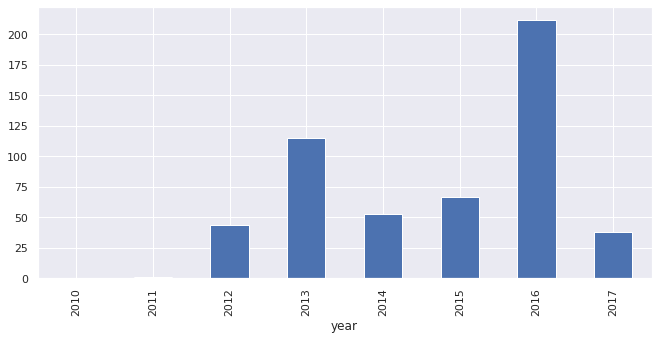

In [35]:
tesla_per_year.plot(kind='bar')

Alternatively, you can give this Series to Seaborn:

<AxesSubplot:xlabel='year'>

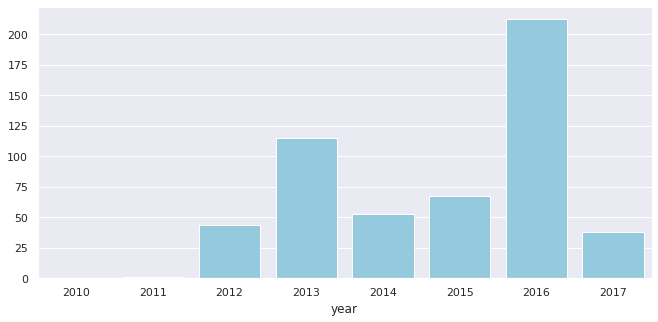

In [36]:
sns.barplot(x=tesla_per_year.index, y=tesla_per_year.values, color="skyblue")

Some extra styling, a title and a y-axis label. You can even save the result, for instance as .pdf.

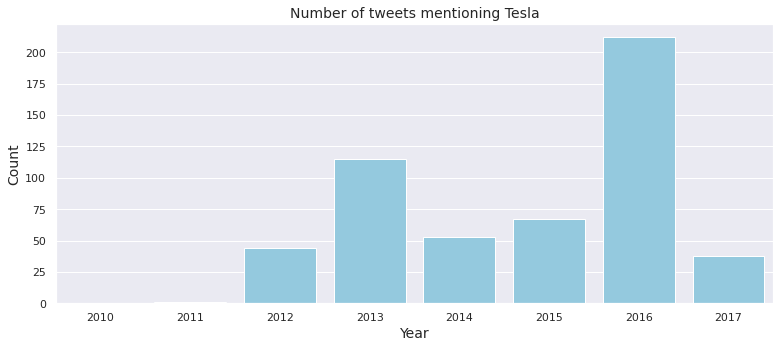

In [37]:
sns.barplot(x=tesla_per_year.index, y=tesla_per_year.values, color="skyblue")

plt.xlabel("Year", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Number of tweets mentioning Tesla", fontsize=14)
plt.tight_layout()

plt.savefig("stuff/elon_plot.pdf")

**Another question:** how many tweets are there per month over time? 

We need to change the index and group. Let's make the datetimestamp the index of our DataFrame. 

In [38]:
df_elon = df_elon.set_index('created_at')

In [39]:
df_elon.head(5)

,id,text,clean_text,year,tesla_in_tweet
created_at,,,,,
2017-04-05 14:56:29,849636868052275200,And so the robots spared humanity ... https://...,robots spared humanity,2017,0
2017-04-03 20:01:01,848988730585096192,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,2017,1
2017-04-03 16:59:35,848943072423497728,"@waltmossberg @mims @defcon_5 Et tu, Walt?",@waltmossberg @mims @defcon_5 Walt,2017,0
2017-04-03 16:30:19,848935705057280001,Stormy weather in Shortville ...,Stormy weather Shortville,2017,0
2017-04-02 06:05:23,848416049573658624,@DaveLeeBBC @verge Coal is dying due to nat ga...,@DaveLeeBBC @verge Coal dying fracking It's ba...,2017,0


Pandas has a `Grouper` method that for instance allows you to easily work with datetimestamps. See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html for some examples. 

We use it to group per month which we do by specifying `freq='M'`. In steps:
1. First, we group by the month using the `pd.Grouper(freq='M'))` method
2. Then we count the number of rows per month using `.count()`
3. Since we are only interested in the count, we can select any row, for instance 'id'

In [40]:
tweets_per_month = df_elon.groupby(pd.Grouper(freq='M')).count()['id']
tweets_per_month

created_at
2010-06-30      1
2010-07-31      0
2010-08-31      0
2010-09-30      0
2010-10-31      0
             ... 
2016-12-31     50
2017-01-31    107
2017-02-28    137
2017-03-31    120
2017-04-30     13
Freq: M, Name: id, Length: 83, dtype: int64

<AxesSubplot:xlabel='created_at'>

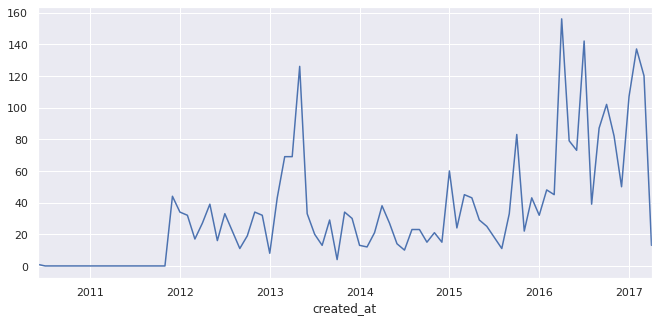

In [41]:
tweets_per_month.plot()

**Remark**: there is much more to this than plotting. Take a loot at the [Seaborn](https://seaborn.pydata.org/examples/index.html) or [Matplotlib](https://matplotlib.org/gallery.html) galleries for some compelling examples.

---

# Data wrangling (extended Pandas example)

We can take a look at another example. We consider the same dataset, and ask the following questions:
* When is Elon most actively tweeting?

While this question is a bit trivial, it will allow us to learn more about how to wrangle data.

In [ ]:
import pandas as pd

### Load dataset

Let's read in the CSV file again to start from scratch.

In [ ]:
df = pd.read_csv(dataset_path, encoding='utf-8')

In [ ]:
df

In [ ]:
df.info()

Let's give this dataset a bit more structure:
- The `id` column can be transformed into the dataframe's index, thus enabling us e.g. to select a tweet by id;
- The column `created_at` contains a timestamp, thus it can easily be converted into a `datetime` value

In [ ]:
df.set_index('id', drop=True, inplace=True)

In [ ]:
df

In [ ]:
df.created_at = pd.to_datetime(df.created_at)

In [ ]:
df.info()

In [ ]:
df

---

### Selection

#### Renaming columns

An operation on dataframes that you'll find yourself doing very often is to rename the columns. The first way of renaming columns is by manipulating directly the dataframe's index via the `columns` property.

In [ ]:
df.columns

We can change the column names by assigning to `columns` a list having as values the new column names.

**NB**: the size of the list and new number of colums must match!

In [ ]:
# here we renamed the column `text` => `tweet`
df.columns = ['created_at', 'tweet']

In [ ]:
# let's check that the change did take place
df.head()

The second way of renaming colums is to use the method `rename()` of a dataframe. The `columns` parameter takes a dictionary of mappings between old and new column names.

```python
mapping_dict = {
    "old_column_name": "new_column_name"
}
```

In [ ]:
# let's change column `tweet` => `text`
df = df.rename(columns={"tweet": "text"})

In [ ]:
df.head()

**Question**: in which cases is it more convenient to use the second method over the first?

#### Selecting columns

In [ ]:
# this selects one single column and returns as a Series
df["created_at"].head()

In [ ]:
type(df["created_at"])

In [ ]:
# whereas this syntax selects one single column
# but returns a Dataframe
df[["created_at"]].head()

In [ ]:
type(df[["created_at"]])

####  Selecting rows

Filtering rows in `pandas` is done by means of `[ ]`, which can contain the row number as well as a condition for the selection.

In [ ]:
df[0:2]

### Transformation


The two main functions used to manipulate and transform values in a dataframe are:
- `.map()` (on Series only!)
- `.apply()`

In this section we'll be using both to enrich our datasets with useful information (useful for exploration, for later visualizations, etc.).

#### Add link to original tweet

The `map()` method can be called on a column, as well as on the dataframe's index.

When passed as a parameter to `map`, an 'anonymous' lambda function `lambda` can be used to transform any value from that column into another one.   

In [ ]:
df['tweet_link'] = df.index.map(lambda x: f'https://twitter.com/i/web/status/{x}')

Or, maybe it is easier with a list comprehension:

In [ ]:
df['tweet_link'] = [f'https://twitter.com/i/web/status/{x}' for x in df.index]

In [ ]:
df

#### Add colums with mentions

In [ ]:
import re

def find_mentions(tweet_text):
    """
    Find all @ mentions in a tweet and 
    return them as a list.
    """
    
    regex = r'@[a-zA-Z0-9_]{1,15}'
    mentions = re.findall(regex, tweet_text)
    
    return mentions

In [ ]:
df['tweet_mentions'] = df.text.apply(find_mentions)

In [ ]:
df['n_mentions'] = df.tweet_mentions.apply(len)

In [ ]:
df.head()

#### Add column with week day and hour

In [ ]:
def day_of_week(t):
    """
    Get the week day name from a week day integer.
    """
    
    if t == 0:
        return "Monday"
    elif t == 1:
        return "Tuesday"
    elif t == 2:
        return "Wednesday"
    elif t == 3:
        return "Thursday"
    elif t == 4:
        return "Friday"
    elif t == 5:
        return "Saturday"
    elif t == 6:
        return "Sunday"

In [ ]:
df["week_day"] = df.created_at.dt.weekday

In [ ]:
df["week_day_name"] = df["week_day"].apply(day_of_week)

Or, there is a built-in function in Pandas that gives back the day name:

In [ ]:
df["week_day_name"] = df.created_at.dt.day_name()

In [ ]:
df.head(3)

#### Add column with day hour

In [ ]:
df.created_at.dt?

In [ ]:
df.created_at.dt.hour.head()

In [ ]:
df["day_hour"] = df.created_at.dt.hour

In [ ]:
display_cols = ['created_at', 'week_day', 'day_hour']
df[display_cols].head(4)

##### Multiple conditions

In [ ]:
# AND condition with `&`

df[
    (df.week_day_name == 'Saturday') & (df.n_mentions == 0)
].shape

In [ ]:
# Equivalent expression with `query()`

df.query("week_day_name == 'Saturday' and n_mentions == 0").shape

In [ ]:
# OR condition with `|`

df[
    (df.week_day_name == 'Saturday') | (df.n_mentions == 0)
].shape

### Aggregation

In [ ]:
df.agg({'n_mentions': ['min', 'max', 'sum']})

#### Grouping

In [ ]:
group_by_day = df.groupby('week_day')

In [ ]:
# The head of a DataFrameGroupBy consists of the first
# n records for each group (see `help(grp_by_day.head)`)

group_by_day.head(1)

`agg` is used to pass an aggregation function to be applied to each group resulting from `groupby`.

Here we are interested in how many tweets there are for each group, so we pass `len()` to an 'aggregate'. This is similar to the `.count()` method. 

In [ ]:
group_by_day.agg(len)

However, we are not interested in having the count for all columns. Rather we want to create a new dataframe with renamed column names.

In [ ]:
group_by_day.agg({'text': len}).rename({'text': 'tweet_count'}, axis='columns')

##### By label (column)

Previously we've added a column indicating on which day of the week a given tweet appeared.

In [ ]:
groupby_result_as_series = df.groupby('day_hour')['text'].count()

In [ ]:
groupby_result_as_series

In [ ]:
groupby_result_as_df = df.groupby('day_hour')[['text']]\
    .count()\
    .rename({'text': 'count'}, axis='columns')

In [ ]:
groupby_result_as_df.head()

##### By series or dict

In [ ]:
df.groupby?

In [ ]:
# here we pass the groups as a series
df.groupby(df.created_at.dt.day).agg({'text':len}).head()

In [ ]:
# here we pass the groups as a series
df.groupby(df.created_at.dt.day)[['text']].count().head()

In [ ]:
df.groupby(df.created_at.dt.hour)[['text']].count().head()

##### By multiple labels (columns)

In [ ]:
# Here we group based on the values of two columns
# instead of one

x = df.groupby(['week_day', 'day_hour'])[['text']].count()

In [ ]:
x.head()

#### Aggregation methods

**Summary**:

- `count`: Number of non-NA values
- `sum`: Sum of non-NA values
- `mean`: Mean of non-NA values
- `median`: Arithmetic median of non-NA values
- `std`, `var`: standard deviation and variance
- `min`, `max`: Minimum and maximum of non-NA values

You can also use these in an aggregation functions within a groupby:

In [ ]:
df.groupby('week_day').agg(
    {
        # each key in this dict specifies
        # a given column
        'n_mentions':[
            # the list contains aggregation functions
            # to be applied to this column
            'count',
            'mean',
            'min',
            'max',
            'std',
            'var'
        ]
    }
)

#### Sorting

To sort the values of  a dataframe we use its `sort_values` method:
- `by`: specifies the name of the column to be used for sorting
- `ascending` (default = `True`): specifies whether the sorting should be *ascending* (A-Z, 0-9) or `descending` (Z-A, 9-0) 

In [ ]:
df.sort_values(by='created_at', ascending=True).head()

In [ ]:
df.sort_values(by='n_mentions', ascending=False).head()

### Save

Before continuing with the plotting, let's save our enhanced dataframe, so that we can come back to it without having to redo the same manipulations on it.

`pandas` provides a number of handy functions to export dataframes in a variety of formats.

Here we use `.to_pickle()` to serialize the dataframe into a binary format, by using behind the scenes Python's `pickle` library. 

In [ ]:
df.to_pickle("stuff/musk_tweets_enhanced.pickle")

## Plotting: Visualizing the example

In [ ]:
df = pd.read_pickle("stuff/musk_tweets_enhanced.pickle")

### `describe()`

The default behavior is to include only column with numerical values

In [ ]:
df.describe()

A trick to include more values is to exclude the datatype on which it breaks, which in our case is `list`. 

In [ ]:
df.describe(exclude=[list])

In [ ]:
df.created_at.describe(datetime_is_numeric=True)

In [ ]:
df['week_day_name'] = df['week_day_name'].astype('category')

In [ ]:
df.describe(exclude=['object'])

### Plotting

In [ ]:
# Not needed in newest Pandas version
%matplotlib inline 

import matplotlib.pyplot as plt

#### Histograms

They are useful to see the distribution of a certain variable in your dataset.

In [ ]:
df.groupby(['n_mentions'])[['text']].count()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df.n_mentions, bins='auto', rwidth=1.0)
plt.title('Distribution of the number of mentions per tweet')
plt.ylabel("Tweets")
plt.xlabel("Mentions (per tweet)")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df.day_hour, bins='auto', rwidth=0.6)
plt.title('Distribution of the number of mentions per tweet')
plt.ylabel("Tweets")
plt.xlabel("Hour of the day")
plt.show()

In [ ]:
df_2017 = df[df.created_at.dt.year == 2017]

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_2017.day_hour, bins='auto', rwidth=0.6)
plt.title('Year 2017')
plt.ylabel("Tweets")
plt.xlabel("Hour of the day")
plt.show()

So far we have used directly `matplotlib` to generate our plots.

`pandas`'s dataframes provide some methods that directly call `matplotlib`'s API behind the scenes:
- `hist()` for histograms
- `boxplot()` for boxplots
- `plot()` for other types of plots (specified with e.g. `any='scatter'`)

By passing the `by` parameter to e.g. `hist()` it is possible to produce one histogram plot of a given variable for each value in another column.

Let's see how we can plot the number of mentions by year:

In [ ]:
df['year'] = df.created_at.dt.year

In [ ]:
axes = df.hist(column='day_hour', by='year', figsize=(10,10))

#### Bar charts

They are useful to plot categorical data.

In [ ]:
plt.bar?

In [ ]:
tweets_by_weekday = df.groupby(df.created_at.dt.weekday)[['text']].count()

In [ ]:
week_days = [
    "Mon",
    "Tue",
    "Wed",
    "Thur",
    "Fri",
    "Sat",
    "Sun"
]

In [ ]:
plt.figure(figsize=(8, 6))

# specify the type of plot and the labels
# for the y axis (the bars)
plt.bar(
    tweets_by_weekday.index,
    tweets_by_weekday.text,
    tick_label=week_days,
    width=0.5
)

# give a title to the plot
plt.title('Elon Musk\'s week on Twitter')

# give a label to the axes
plt.ylabel("Number of tweets")
plt.xlabel("Week day")
plt.show()

#### Box plots

![box plot explained](https://github.com/bloemj/2022-coding-the-humanities/blob/master/notebooks/images/eda-boxplot.png?raw=1)

### Outliers, missing values

An *outlier* is an observation far from the center of mass of the distribution. It might be an error or a genuine observation: this distinction requires domain knowledge. Outliers infuence the outcomes of several statistics and machine learning methods: it is important to decide how to deal with them.

A *missing value* is an observation without a value. There can be many reasons for a missing value: the value might not exist (hence its absence is informative and it should be left empty) or might not be known (hence the value is existing but missing in the dataset and it should be marked as NA).

*One way to think about the difference is with this Zen-like koan: An explicit missing value is the presence of an absence; an implicit missing value is the absence of a presence.*

In [ ]:
tweets_by_weekday

In [ ]:
tweets_by_weekday.describe()

In [ ]:
tweets_by_weekday.boxplot()

In [ ]:
plt.bar?

In [ ]:
df.head(3)

In [ ]:
df[['day_hour']].describe()

In [ ]:
df[['day_hour']].quantile(.25)

In [ ]:
df.boxplot?

In [ ]:
df[['day_hour', 'week_day_name']].boxplot(
    by='week_day_name',
    grid=False,
    figsize=(8,6),
    fontsize=10
)

# give a title to the plot
plt.title('')

# give a label to the axes
plt.xlabel("Day of the week")
plt.show()

In [ ]:
df[['day_hour', 'week_day']].boxplot(
    by='week_day',
    grid=True, # just to show the difference with/without
    figsize=(8,6),
    fontsize=10
)

# give a title to the plot
plt.title('')

# give a label to the axes
plt.xlabel("Day of the week")
plt.show()

---

### Exercise 1.

* Create a function that calculates the frequency of hashtags in tweets.
* Test it on toy examples, to make sure it works.
* Apply it to Elon Musk's tweets.
* List the top 10 hashtags in the dataset.

In [ ]:
# Your code here.

### Exercise 2.

With these tweets:
* Plot the top n words together in a single figure, and show their trends over time.
* Do the same for the top n users mentioned.

In [ ]:
# Your code here

---